:::{currentmodule} tskit
:::

In [1]:
import msprime

def basic_sim():
    ts = msprime.sim_ancestry(
        3,
        population_size=1000,
        model="dtwf",
        sequence_length=1e4,
        recombination_rate=1e-7,
        random_seed=665)
    ts = msprime.sim_mutations(ts, rate=2e-7, random_seed=123)
    ts.dump("data/basic_tree_seq.trees")
    
def create_notebook_data():
    basic_sim()

# create_notebook_data()  # uncomment to recreate the tree seqs used in this notebook

# Quickstart

Our {ref}`tutorials site<tutorials:sec_intro>` has a more extensive tutorial on
{ref}`sec_tskit_getting_started`. Below we just give a quick flavour of the
{ref}`sec_python_api` (note that
APIs in {ref}`C <sec_c_api>` and Rust exist, and it is also possible to
{ref}`interface to the Python library in R <tutorials:sec_tskit_r>`).

## Basic properties

Any tree sequence, such as one generated by {ref}`msprime <msprime:sec_intro>`, can be
loaded, and a summary table printed. This example uses a small tree sequence, but the
`tskit` library scales effectively to ones encoding millions of genomes and variable
sites.

In [2]:
import tskit

ts = tskit.load("data/basic_tree_seq.trees")  # Or generate using e.g. msprime.sim_ancestry()
ts  # In a Jupyter notebook this displays a summary table. Otherwise use print(ts)

## Individual trees

You can get e.g. the first tree in the tree sequence and analyse it.

Total branch length in first tree is 4496.0 generations
The first of 4 trees is plotted below


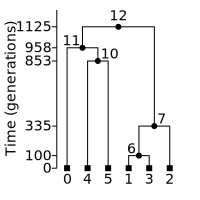

In [3]:
first_tree = ts.first()
print("Total branch length in first tree is", first_tree.total_branch_length, ts.time_units)
print("The first of", ts.num_trees, "trees is plotted below")
first_tree.draw_svg(y_axis=True)  # plot the tree: only useful for small trees

## Extracting genetic data

A tree sequence provides an extremely compact way to
{ref}`store genetic variation data <tutorials:sec_what_is_dna_data>`. The trees allow
this data to be {meth}`decoded <Variant.decode>` at each site:

In [4]:
for variant in ts.variants():
    print(
        "Variable site", variant.site.id,
        "at genome position", variant.site.position,
        ":", [variant.alleles[g] for g in variant.genotypes],
    )

Variable site 0 at genome position 536.0 : ['A', 'A', 'A', 'A', 'G', 'A']
Variable site 1 at genome position 2447.0 : ['C', 'G', 'G', 'G', 'G', 'G']
Variable site 2 at genome position 6947.0 : ['G', 'C', 'C', 'C', 'C', 'C']
Variable site 3 at genome position 7868.0 : ['C', 'C', 'C', 'C', 'C', 'T']
Variable site 4 at genome position 8268.0 : ['C', 'C', 'C', 'C', 'T', 'C']


## Analysis

Tree sequences enable {ref}`efficient analysis <tutorials:sec_what_is_analysis>`
of genetic variation using a comprehensive range of built-in {ref}`sec_stats`:

In [5]:
genetic_diversity = ts.diversity()
print("Av. genetic diversity across the genome is", genetic_diversity)

branch_diversity = ts.diversity(mode="branch")
print("Av. genealogical dist. between pairs of tips is", branch_diversity,  ts.time_units)

Av. genetic diversity across the genome is 0.00016666666666666666
Av. genealogical dist. between pairs of tips is 1645.8752266666668 generations


## Plotting the whole tree sequence

This can give you a visual feel for small genealogies:

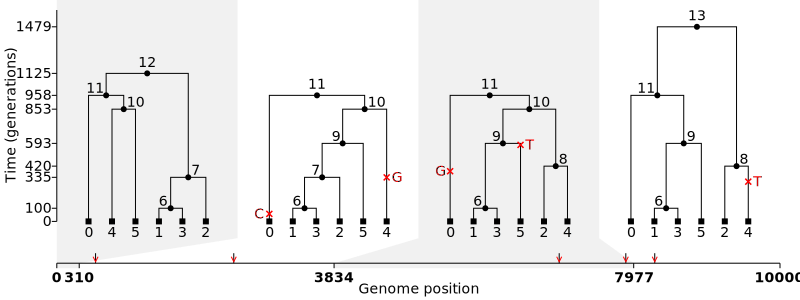

In [6]:
ts.draw_svg(
    size=(800, 300),
    y_axis=True,
    mutation_labels={m.id: m.derived_state for m in ts.mutations()},
)

## Underlying data structures

The data that defines a tree sequence is stored in a set of tables. These tables
can be viewed, and copies of the tables can be edited to create a new tree sequence.

In [7]:
# The sites table is one of several tables that underlie a tree sequence
ts.tables.sites

id,position,ancestral_state,metadata
0,536,A,
1,2447,G,
2,6947,C,
3,7868,C,
4,8268,C,


The rest of this documentation gives a comprehensive description of the entire `tskit`
library, including {ref}`descriptions and definitions <sec_table_definitions>` of all
the tables.